In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
rawdat = pd.read_csv("/srv/scratch/z3289452/OceanDataScience/Ship_data/NRSPHB_1953_2010.csv")

In [9]:
rawdat.columns

Index(['SURVEY_NAME', 'STATION_NO', 'START_TIME', 'END_TIME', 'MIN_DEPTH',
       'MAX_DEPTH', 'BOTTTOM_DEPTH', 'BOTTOM_TIME', 'BOTTOM_LAT', 'BOTTOM_LON',
       'END_LAT', 'END_LON', 'START_LAT', 'START_LON', 'PROJECT_NAME',
       'MARLIN_ID', 'BOTTLE_NUMBER', 'PRESSURE', 'ROSETTE_POSITION',
       'ROSETTE_POSITION_QC_FLAG', 'NITRATE_VALUE', 'NITRATE_QC_FLAG',
       'NITRITE_VALUE', 'NITRITE_QC_FLAG', 'OXYGEN_VALUE', 'OXYGEN_QC_FLAG',
       'PHOSPHATE_VALUE', 'PHOSPHATE_QC_FLAG', 'SALINITY_VALUE',
       'SALINITY_QC_FLAG', 'SILICATE_VALUE', 'SILICATE_QC_FLAG',
       'TEMPERATURE_VALUE', 'TEMPERATURE_QC_FLAG', 'AMMONIA_VALUE',
       'AMMONIA_QC_FLAG'],
      dtype='object')

In [10]:
# rawdat = rawdat.loc[:,~rawdat.columns.isin(['START_TIME'])]
# rawdat.drop(columns=rawdat.columns[[0,1,3,]])
rawdat = rawdat[['START_TIME','PRESSURE', 'TEMPERATURE_VALUE', 'TEMPERATURE_QC_FLAG', 'SALINITY_VALUE', 'SALINITY_QC_FLAG', 'NITRATE_VALUE', 'NITRATE_QC_FLAG', 
                 'NITRITE_VALUE', 'NITRITE_QC_FLAG', 'OXYGEN_VALUE', 'OXYGEN_QC_FLAG', 'PHOSPHATE_VALUE', 'PHOSPHATE_QC_FLAG', 'SILICATE_VALUE', 'SILICATE_QC_FLAG', 
                 'AMMONIA_VALUE', 'AMMONIA_QC_FLAG']]
rawdat.head()

,START_TIME,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,31/05/1953 0:00,0.0,18.6,0.0,35.444,0.0,< 0.02,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,31/05/1953 0:00,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,31/05/1953 0:00,20.0,18.7,0.0,35.462,0.0,< 0.02,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,31/05/1953 0:00,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,31/05/1953 0:00,40.0,18.8,0.0,35.444,0.0,< 0.02,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [11]:
rawdat.NITRATE_VALUE = rawdat.NITRATE_VALUE.where(rawdat.NITRATE_VALUE != '< 0.02', '0')
rawdat.NITRATE_VALUE = pd.to_numeric(rawdat.NITRATE_VALUE)
rawdat.head()

,START_TIME,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,31/05/1953 0:00,0.0,18.6,0.0,35.444,0.0,0.0,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,31/05/1953 0:00,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,31/05/1953 0:00,20.0,18.7,0.0,35.462,0.0,0.0,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,31/05/1953 0:00,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,31/05/1953 0:00,40.0,18.8,0.0,35.444,0.0,0.0,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [12]:
datetime = pd.to_datetime(rawdat.START_TIME, infer_datetime_format=True, dayfirst=True)
rawdat.insert(0,'Year',datetime.dt.year)
rawdat.insert(1,'Yday',datetime.dt.dayofyear)
rawdat.insert(2,'Hour',datetime.dt.hour)
rawdat.drop(columns=['START_TIME'], inplace = True)
rawdat.head()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,1953,151,0,0.0,18.6,0.0,35.444,0.0,0.0,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,1953,151,0,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,1953,151,0,20.0,18.7,0.0,35.462,0.0,0.0,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,1953,151,0,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,1953,151,0,40.0,18.8,0.0,35.444,0.0,0.0,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [13]:
nitrate = rawdat.drop(columns=['NITRITE_VALUE','NITRITE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
nitrate.dropna(inplace=True)
nitrate = nitrate[(nitrate.NITRATE_QC_FLAG == 0.0) & (nitrate.TEMPERATURE_QC_FLAG == 0.0) & (nitrate.SALINITY_QC_FLAG == 0.0)]
nitrate.head(), nitrate.shape

(    Year  Yday  Hour  PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  \
 1   1953   151     0      10.0               18.6                  0.0   
 3   1953   151     0      30.0               18.8                  0.0   
 6   1953   151     0      75.0               17.1                  0.0   
 7   1953   151     0     100.0               16.2                  0.0   
 10  1953   160     0      20.0               18.0                  0.0   
 
     SALINITY_VALUE  SALINITY_QC_FLAG  NITRATE_VALUE  NITRATE_QC_FLAG  
 1           35.371               0.0            0.1              0.0  
 3           35.462               0.0            1.2              0.0  
 6           35.480               0.0            3.1              0.0  
 7           35.570               0.0            6.7              0.0  
 10          35.389               0.0            0.2              0.0  ,
 (13193, 10))

In [14]:
nitrate.tail()

,Year,Yday,Hour,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG
15535,2010,76,22,10.0,22.768,0.0,35.427,0.0,0.12,0.0
15537,2010,76,22,25.0,19.530,0.0,35.492,0.0,0.21,0.0
15540,2010,76,22,50.0,16.060,0.0,35.428,0.0,8.69,0.0
15542,2010,76,22,75.0,14.716,0.0,35.321,0.0,10.48,0.0
15543,2010,76,22,100.0,14.320,0.0,35.373,0.0,10.91,0.0


(array([1.2228e+04, 6.0000e+00, 0.0000e+00, 0.0000e+00, 3.3000e+01,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 7.5000e+01, 8.4800e+02]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

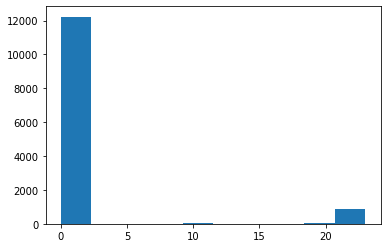

In [15]:
plt.hist(nitrate.Hour)

(array([1113., 1334., 2429., 3027., 3076., 1175.,  186.,  276.,  317.,
         260.]),
 array([1953. , 1958.7, 1964.4, 1970.1, 1975.8, 1981.5, 1987.2, 1992.9,
        1998.6, 2004.3, 2010. ]),
 <a list of 10 Patch objects>)

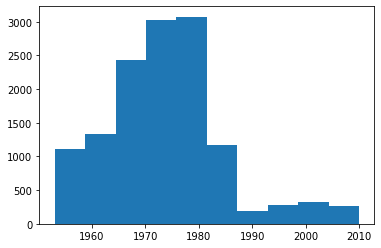

In [17]:
plt.hist(nitrate.Year)

(array([6.595e+03, 2.168e+03, 1.717e+03, 1.750e+03, 8.020e+02, 1.330e+02,
        2.200e+01, 5.000e+00, 0.000e+00, 1.000e+00]),
 array([2.0000e-02, 2.5980e+00, 5.1760e+00, 7.7540e+00, 1.0332e+01,
        1.2910e+01, 1.5488e+01, 1.8066e+01, 2.0644e+01, 2.3222e+01,
        2.5800e+01]),
 <a list of 10 Patch objects>)

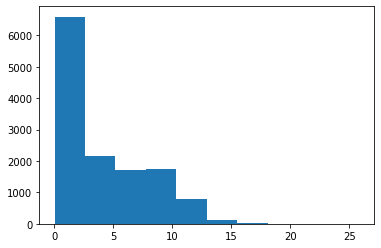

In [18]:
plt.hist(nitrate.NITRATE_VALUE)

In [31]:
nitrate.groupby('PRESSURE').count()

,Year,Yday,Hour,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG
PRESSURE,,,,,,,,,
0.0,1427,1427,1427,1427,1427,1427,1427,1427,1427
4.0,1,1,1,1,1,1,1,1,1
5.0,5,5,5,5,5,5,5,5,5
6.0,2,2,2,2,2,2,2,2,2
7.0,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...
292.0,1,1,1,1,1,1,1,1,1
293.0,3,3,3,3,3,3,3,3,3
295.0,2,2,2,2,2,2,2,2,2


(array([4180., 4088., 3151., 1323.,  133.,  132.,   69.,   15.,   58.,
          44.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <a list of 10 Patch objects>)

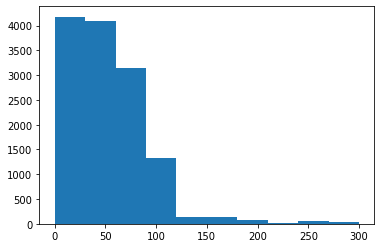

In [32]:
plt.hist(nitrate.PRESSURE)

In [46]:
nitrate.where((nitrate.Year == 1980) & (nitrate.PRESSURE < 110.)).groupby('PRESSURE').count()

,Year,Yday,Hour,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG
PRESSURE,,,,,,,,,
0.0,49,49,49,49,49,49,49,49,49
10.0,44,44,44,44,44,44,44,44,44
20.0,47,47,47,47,47,47,47,47,47
25.0,1,1,1,1,1,1,1,1,1
30.0,48,48,48,48,48,48,48,48,48
40.0,46,46,46,46,46,46,46,46,46
50.0,50,50,50,50,50,50,50,50,50
60.0,49,49,49,49,49,49,49,49,49
70.0,49,49,49,49,49,49,49,49,49


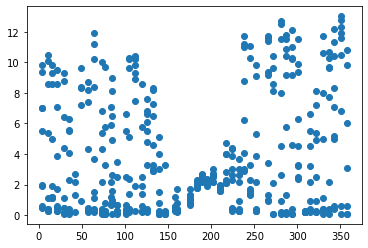

In [47]:
plt.scatter(nitrate.where((nitrate.Year == 1980) & (nitrate.PRESSURE < 110.)).Yday, nitrate.where((nitrate.Year == 1980) & (nitrate.PRESSURE < 110.)).NITRATE_VALUE)

In [39]:
nitrate.PRESSURE

1         10.0
3         30.0
6         75.0
7        100.0
10        20.0
         ...  
15535     10.0
15537     25.0
15540     50.0
15542     75.0
15543    100.0
Name: PRESSURE, Length: 13193, dtype: float64

## Now get the other csv from 2009 onwards

In [26]:
rawdat = pd.read_csv("/srv/scratch/z3289452/OceanDataScience/Ship_data/NRSPHB_2009_2020.csv", skiprows=68)

In [27]:
rawdat.columns

Index(['FID', 'STATION_NAME', 'LOCAL_TRIP_START_TIME', 'IMOS_SITE_CODE',
       'NRS_TRIP_CODE', 'NRS_SAMPLE_CODE', 'UTC_TRIP_START_TIME', 'LATITUDE',
       'LONGITUDE', 'SAMPLE_DEPTH_M', 'SALINITY', 'SALINITY_FLAG',
       'SALINITY_COMMENTS', 'SILICATE_UMOL_PER_L', 'SILICATE_FLAG',
       'NITRATE_UMOL_PER_L', 'NITRATE_FLAG', 'PHOSPHATE_UMOL_PER_L',
       'PHOSPHATE_FLAG', 'AMMONIUM_UMOL_PER_L', 'AMMONIUM_FLAG',
       'NUTRIENT_COMMENTS', 'TCO2_UMOL_PER_KG', 'CARBON_FLAG',
       'CARBON_COMMENTS', 'TALKALINITY_UMOL_PER_KG', 'ALKALINITY_FLAG',
       'ALKALINITY_COMMENTS', 'OXYGEN_UMOL_PER_L', 'OXYGEN_FLAG',
       'OXYGEN_COMMENTS', 'geom'],
      dtype='object')

In [28]:
# rawdat = rawdat.loc[:,~rawdat.columns.isin(['START_TIME'])]
# rawdat.drop(columns=rawdat.columns[[0,1,3,]])
rawdat = rawdat[['UTC_TRIP_START_TIME','SAMPLE_DEPTH_M','NITRATE_UMOL_PER_L','NITRATE_FLAG']]
rawdat.head()

,UTC_TRIP_START_TIME,SAMPLE_DEPTH_M,NITRATE_UMOL_PER_L,NITRATE_FLAG
0,2009-02-23T22:27:00Z,0.0,0.0,1
1,2009-02-23T22:27:00Z,10.0,0.1,1
2,2009-02-23T22:27:00Z,20.0,2.4,1
3,2009-02-23T22:27:00Z,25.0,4.3,1
4,2009-02-23T22:27:00Z,30.0,5.6,1


In [29]:
datetime = pd.to_datetime(rawdat.UTC_TRIP_START_TIME, infer_datetime_format=True, dayfirst=True)
rawdat.insert(0,'Year',datetime.dt.year)
rawdat.insert(1,'Yday',datetime.dt.dayofyear)
rawdat.insert(2,'Hour',datetime.dt.hour)
# rawdat.drop(columns=['START_TIME'], inplace = True)
rawdat.head()

,Year,Yday,Hour,UTC_TRIP_START_TIME,SAMPLE_DEPTH_M,NITRATE_UMOL_PER_L,NITRATE_FLAG
0,2009,54,22,2009-02-23T22:27:00Z,0.0,0.0,1
1,2009,54,22,2009-02-23T22:27:00Z,10.0,0.1,1
2,2009,54,22,2009-02-23T22:27:00Z,20.0,2.4,1
3,2009,54,22,2009-02-23T22:27:00Z,25.0,4.3,1
4,2009,54,22,2009-02-23T22:27:00Z,30.0,5.6,1


In [30]:
rawdat.dropna(inplace=True)
rawdat = rawdat[(rawdat.NITRATE_FLAG == 1) | (rawdat.NITRATE_FLAG == 2)]
rawdat.head(), rawdat.shape

(   Year  Yday  Hour   UTC_TRIP_START_TIME  SAMPLE_DEPTH_M  NITRATE_UMOL_PER_L  \
 0  2009    54    22  2009-02-23T22:27:00Z             0.0                 0.0   
 1  2009    54    22  2009-02-23T22:27:00Z            10.0                 0.1   
 2  2009    54    22  2009-02-23T22:27:00Z            20.0                 2.4   
 3  2009    54    22  2009-02-23T22:27:00Z            25.0                 4.3   
 4  2009    54    22  2009-02-23T22:27:00Z            30.0                 5.6   
 
    NITRATE_FLAG  
 0             1  
 1             1  
 2             1  
 3             1  
 4             1  , (1152, 7))

(array([ 150.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1002.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

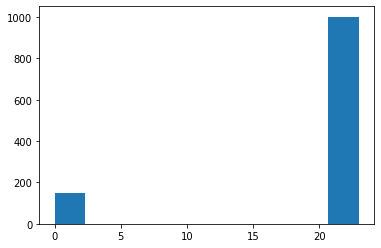

In [33]:
plt.hist(rawdat.Hour)

(array([129., 119., 120.,  90., 109., 119.,  91.,  69.,  80., 226.]),
 array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019.]),
 <a list of 10 Patch objects>)

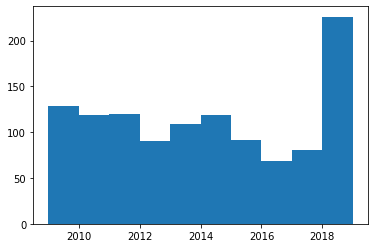

In [34]:
plt.hist(rawdat.Year)

(array([117., 116., 228., 118., 117., 116., 114., 114.,   0., 112.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

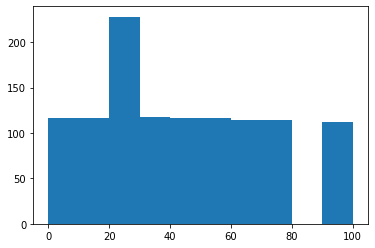

In [35]:
plt.hist(rawdat.SAMPLE_DEPTH_M)

(array([444., 182., 105.,  70.,  73.,  72.,  87.,  78.,  32.,   9.]),
 array([-0.1 ,  1.22,  2.54,  3.86,  5.18,  6.5 ,  7.82,  9.14, 10.46,
        11.78, 13.1 ]),
 <a list of 10 Patch objects>)

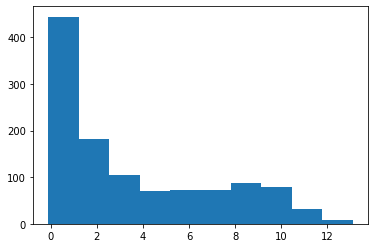

In [36]:
plt.hist(rawdat.NITRATE_UMOL_PER_L)